# What do your blood sugars tell you?

## 📖 Background

Diabetes mellitus remains a global health issue, causing several thousand people to die each day from this single condition. Finding and avoiding diabetes in the earlier stages can help reduce the risk of serious health issues such as circulatory system diseases, kidney malfunction, and vision loss. This competition involves developing a predictive model for effectively detecting potential Diabetes cases, ideally, before commencing preventive treatment.


## 💾 The data

The dataset contains diagnostic measurements that are associated with diabetes, which were collected from a population of Pima Indian women. The data includes various medical and demographic attributes, making it a well-rounded resource for predictive modeling.

The columns and Data Types are as follows:

- Pregnancies
Type: Numerical (Continuous)
Description: Number of times the patient has been pregnant.

- Glucose
Type: Numerical (Continuous)
Description: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure
Type: Numerical (Continuous)
Description: Diastolic blood pressure (mm Hg).

- SkinThickness
Type: Numerical (Continuous)
Description: Triceps skinfold thickness (mm).

- Insulin
Type: Numerical (Continuous)
Description: 2-Hour serum insulin (mu U/ml).

- BMI
Type: Numerical (Continuous)
Description: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction
Type: Numerical (Continuous)
Description: A function that represents the likelihood of diabetes based on family history.

- Age
Type: Numerical (Continuous)
Description: Age of the patient in years.

- Outcome
Type: Categorical (Binary)
Description: Class variable (0 or 1) indicating whether the patient is diagnosed with diabetes. 1 = Yes, 0 = No.

In [13]:
import pandas as pd

data = pd.read_csv('data/diabetes.csv')
# Display the first few rows of the DataFrame
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Visualizing the data distribution of glucose

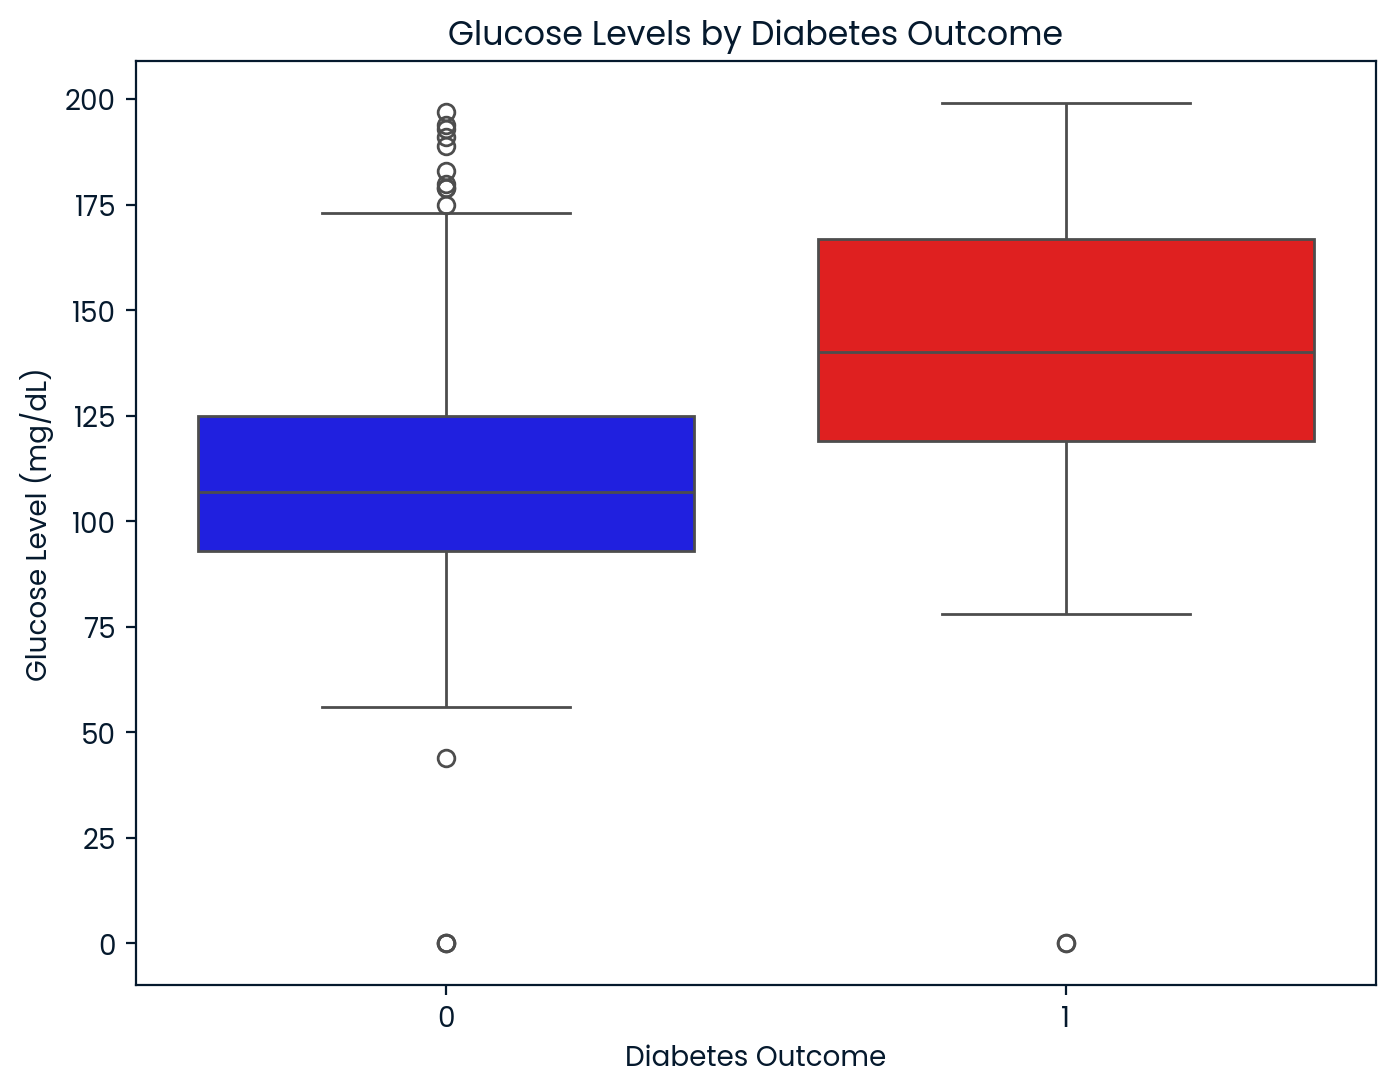

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Outcome' is treated as a categorical variable
data['Outcome'] = data['Outcome'].astype('category')

# Boxplot of Glucose levels by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()


#### Visualizing the age distribution

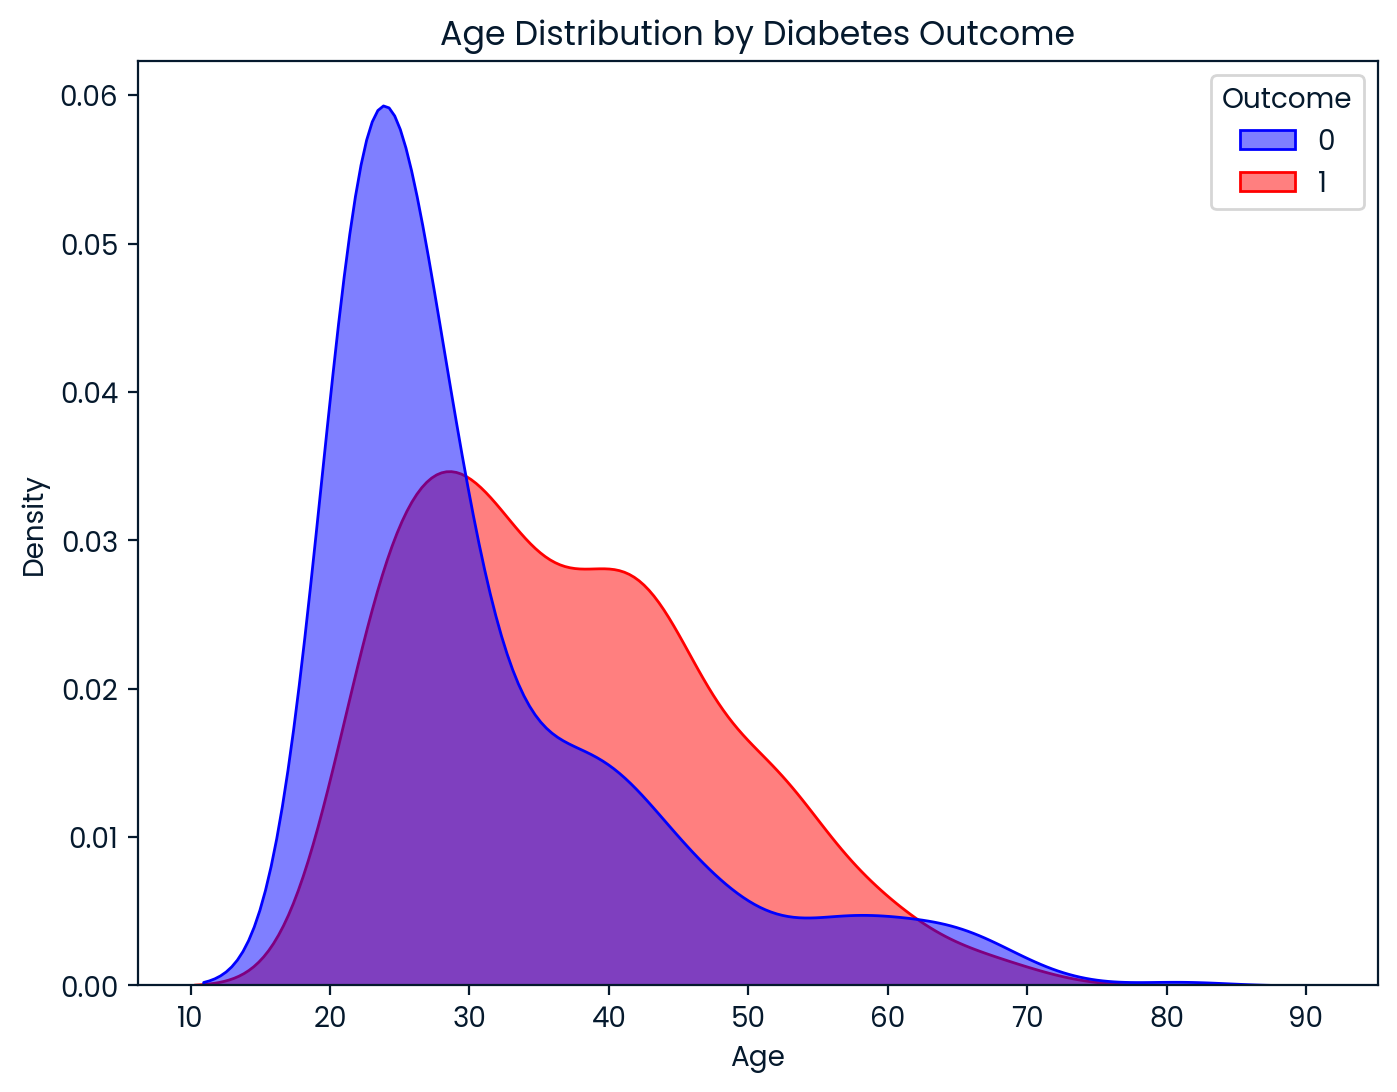

In [15]:
# Density plot of Age by Outcome
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Age', hue='Outcome', fill=True, common_norm=False, palette=["blue", "red"], alpha=0.5)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


# Exploratory Data Analysis

## Boxplot of BMI levels by Outcome

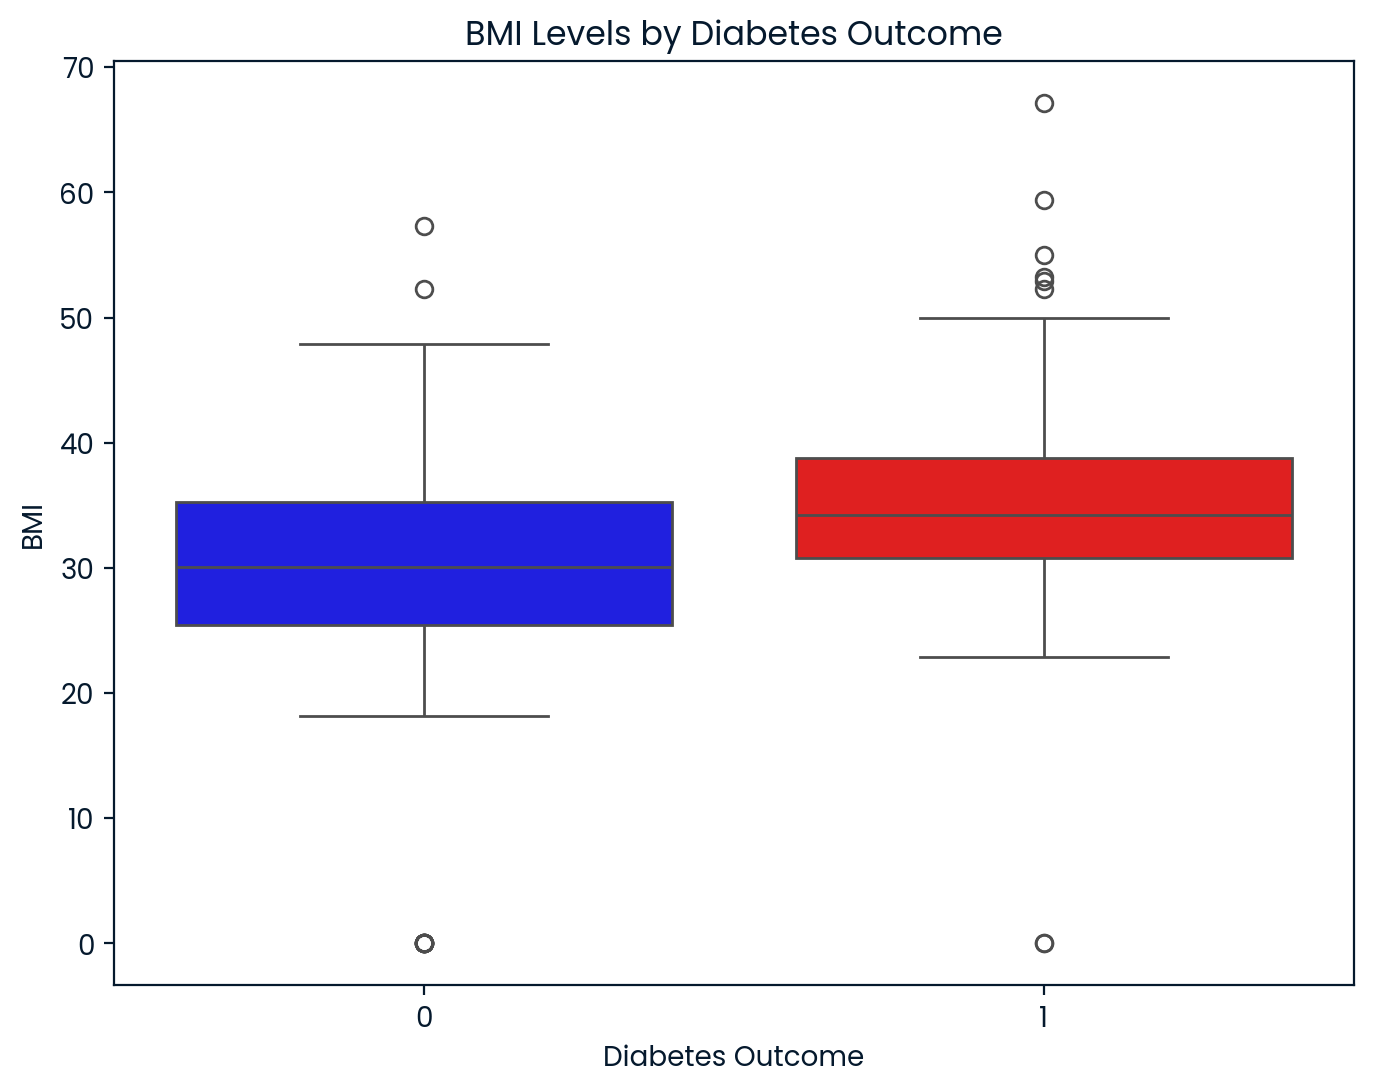

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=data, palette=["blue", "red"])
plt.title("BMI Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("BMI")
plt.show()

## Density plot of Glucose by Outcome

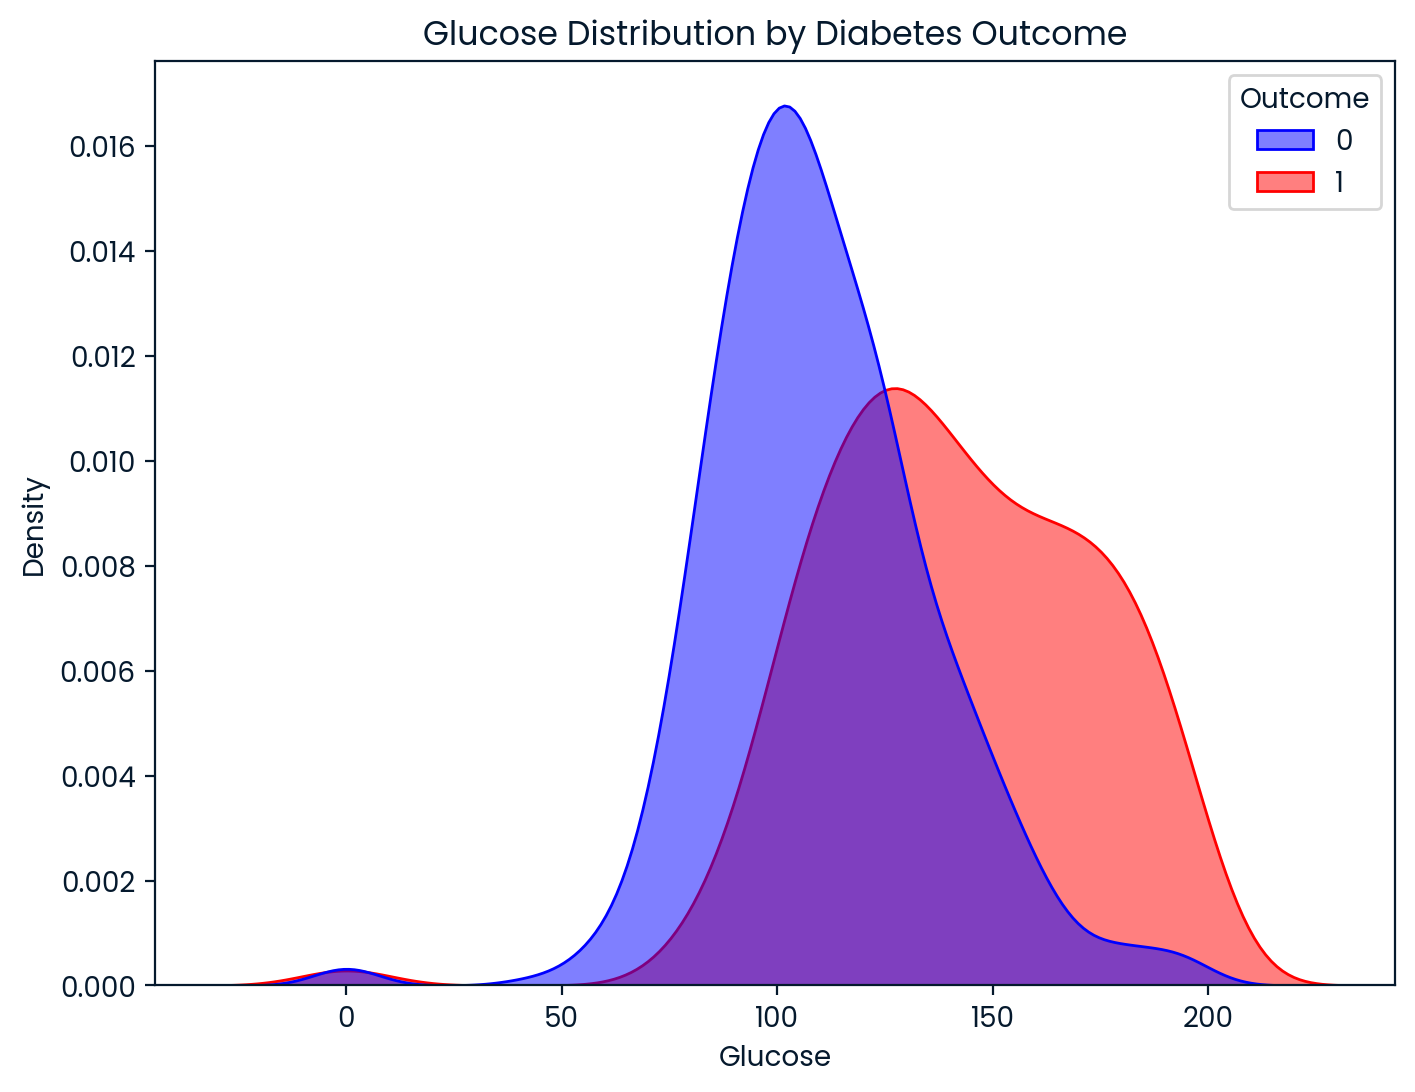

In [17]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Glucose', hue='Outcome', fill=True, common_norm=False, palette=["blue", "red"], alpha=0.5)
plt.title("Glucose Distribution by Diabetes Outcome")
plt.xlabel("Glucose")
plt.ylabel("Density")
plt.show()

 # Feature Importance Using a Predictive Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Separate features and target variable

In [19]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

## Split the data into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Random Forest Classifier

In [21]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predict and evaluate the model

In [22]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



## Feature importance

In [23]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                    Feature  Importance
1                   Glucose    0.258864
5                       BMI    0.169984
7                       Age    0.140931
6  DiabetesPedigreeFunction    0.123768
2             BloodPressure    0.088134
0               Pregnancies    0.076551
4                   Insulin    0.076122
3             SkinThickness    0.065646


# Risk Prediction for a Specific Case

## Given parameters

In [24]:
age = 54
height = 178  
weight = 96  
glucose = 125  

## Calculating BMI

In [25]:
bmi = weight / (height/100)**2

person_data = pd.DataFrame([[0, glucose, 80, 20, 85, bmi, 0.5, age]], 
                           columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

## Predict the outcome

In [26]:
risk_prediction = clf.predict(person_data)
risk_probability = clf.predict_proba(person_data)

print(f"Predicted Diabetes Outcome: {'Yes' if risk_prediction[0] == 1 else 'No'}")
print(f"Probability of Diabetes: {risk_probability[0][1]:.2f}")

Predicted Diabetes Outcome: Yes
Probability of Diabetes: 0.52


## Interactive density plot using Plotly

In [27]:
import plotly.express as px

fig = px.violin(data, x='Outcome', y='Age', color='Outcome', box=True, points="all", hover_data=data.columns,
                title="Age Distribution by Diabetes Outcome",
                labels={'Outcome': 'Diabetes Outcome', 'Age': 'Age'},
                color_discrete_map={0: "blue", 1: "red"})
fig.show()